In [1]:
# import requests
# from bs4 import BeautifulSoup
# import bs4
# URL = 'https://en.wikipedia.org/wiki/2020_Pacific_typhoon_season'
# page = requests.get(URL)

# soup = BeautifulSoup(page.content, 'html.parser')
# print(soup.prettify())

In [2]:
# import csv
# import requests
# from bs4 import BeautifulSoup
# import bs4
# import numpy as np 

# years = np.arange(2018,2019)

# def names(tags):
#     return [t.name for t in tags]

# for year in years:
#     URL = f'https://en.wikipedia.org/wiki/{year}_Pacific_typhoon_season'
#     page = requests.get(URL)

#     soup = BeautifulSoup(page.content, 'html.parser')
    
#     all_tags = [c for c in soup.find(class_='mw-parser-output') if isinstance(c, bs4.Tag)]    

#     keys = ['name','jma_cat','sshws_cat']
#     groups = []

#     i = 0

#     row_list = []
#     print(f'Scraping {year}:::')
#     try:
#         while i < len(all_tags):
#             group = all_tags[i:i + 2]
#             if names(group) == ['h3', 'table']:
#                 print(f'\t{group}')
#                 row = {}
#                 row['name'] = group[0].find(class_='mw-headline').text
#                 print(f"GROUP3::: {group[1]['class']}")
#                 if group[1]['class'] == ['infobox']:
#                     categories = group[1].findAll('tr')
#                     row['jma_cat'] = categories[0].td.text
#                     row['sshws_cat'] = categories[1].td.text
#                 else:
#                     categories = all_tags[i+2].findAll('tr')
#                     print(f'sadasdas{all_tags[i+2]}')
#                     row['jma_cat'] = categories[0].td.text
#                     row['sshws_cat'] = categories[1].td.text
#                     i+=1

#                 row_list.append(row)
#             i += 1


#     finally:
#         with open(f'{year}_pacific_storms.csv', 'w', newline='')  as output_file:
#             dict_writer = csv.DictWriter(output_file, keys)
#             dict_writer.writeheader()
#             dict_writer.writerows(row_list)

In [3]:
# import unicodedata

# import csv
# import requests
# from bs4 import BeautifulSoup
# import bs4
# import numpy as np 
# import json

# years = np.arange(1970,2021)

# for year in years:
#     URL = f'https://en.wikipedia.org/wiki/{year}_Pacific_typhoon_season'
#     page = requests.get(URL)

#     soup = BeautifulSoup(page.content, 'html.parser')
#     h3_storms = soup.findAll('h3')
#     yearly_data = []
#     for h3_storm in h3_storms:
#         headline_tag = h3_storm.find(class_='mw-headline')
#         categories = []
#         if headline_tag:
#             itr = h3_storm
#             while True:
#                 itr = itr.findNextSibling()
# #                 print(f'{itr}\n\n')
#                 if itr is None or not itr.has_attr('class'): 
#                     break
#                 elif itr and itr.name == 'table' and 'infobox' in itr['class']:
#                     trs = itr.tbody.findAll('tr')
#                     for tr in trs:
#                         if tr.td.findChildren() == []:
#                             categories.append(unicodedata.normalize("NFKD",tr.td.text))
#                         else: 
#                             break
# #                     print(headline_tag.text,categories)
#                     yearly_data.append(dict(name=headline_tag.text,categories=categories))
#                     break
#     with open(f'datasets/{year}_Pacific_typhoon_season.json','w') as outfile:
#         print(f'{year}={len(yearly_data)}')
#         json.dump(yearly_data,outfile)

In [4]:
import pandas as pd
import itertools
import numpy as np

In [5]:
years = np.arange(1971,2021)


df = pd.read_json(f'datasets/1970_Pacific_typhoon_season.json')
df['year'] = 1970
df.head()

,name,categories,year
0,Typhoon Nancy (Atang),"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",1970
1,CMA Tropical Depression Two,[Tropical depression (CMA)],1970
2,CMA Tropical Storm 03,[Tropical storm (CMA)],1970
3,Tropical Depression Bising,[Tropical depression (PAGASA)],1970
4,CMA Tropical Depression Five,[Tropical depression (CMA)],1970


In [6]:
for year in years:
    tmp_df = pd.read_json(f'datasets/{year}_Pacific_typhoon_season.json')
    tmp_df['year'] = year
    df = pd.concat([df,tmp_df])
df = df.reset_index(drop=True)
df.head()

,name,categories,year
0,Typhoon Nancy (Atang),"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",1970
1,CMA Tropical Depression Two,[Tropical depression (CMA)],1970
2,CMA Tropical Storm 03,[Tropical storm (CMA)],1970
3,Tropical Depression Bising,[Tropical depression (PAGASA)],1970
4,CMA Tropical Depression Five,[Tropical depression (CMA)],1970


In [7]:
# Let's check the categories that  we have
# They all look valid except 
#    1. Monsoon depression
#    2. Vamco
set(itertools.chain.from_iterable(df['categories']))

{'Category 1 typhoon (SSHWS)',
 'Category 2 typhoon (SSHWS)',
 'Category 3 typhoon (SSHWS)',
 'Category 4 super typhoon (SSHWS)',
 'Category 4 typhoon (SSHWS)',
 'Category 5 super typhoon (SSHWS)',
 'Monsoon depression',
 'Severe tropical storm (JMA)',
 'Subtropical depression (SSHWS)',
 'Subtropical storm (SSHWS)',
 'Tropical depression (CMA)',
 'Tropical depression (HKO)',
 'Tropical depression (JMA)',
 'Tropical depression (PAGASA)',
 'Tropical depression (SSHWS)',
 'Tropical storm (CMA)',
 'Tropical storm (JMA)',
 'Tropical storm (PAGASA)',
 'Tropical storm (SSHWS)',
 'Typhoon (JMA)',
 'Vamco'}

In [8]:
df[df['name'] == 'Typhoon Vamco (Ulysses)']

,name,categories,year
1636,Typhoon Vamco (Ulysses),"[Vamco, Vamco]",2020


In [9]:
# Upon further investigation, looks like the scraped value from Typhoon Vamco
# is wrong because it's still active (as of Nov. 14, 2020)
print(df[df['categories'].apply(lambda row_categories: 'Vamco' in row_categories)])

# Looks like Monsoon depression should not be there. So let's just remove it. This will
# just confuse the dataset
print(df[df['categories'].apply(lambda row_categories: 'Monsoon depression' in row_categories)])

                         name      categories  year
1636  Typhoon Vamco (Ulysses)  [Vamco, Vamco]  2020
                             name  \
1595  Tropical Depression Marilyn   

                                           categories  year  
1595  [Tropical depression (JMA), Monsoon depression]  2019  


In [10]:
df.loc[[1636],'categories'] = pd.Series([['Category 2 typhoon (SSHWS)', 'Typhoon  (JMA)']],index=[1636])
df.loc[[1595],'categories'] = pd.Series([['Tropical depression (JMA)']],index=[1595])

In [11]:
df

,name,categories,year
0,Typhoon Nancy (Atang),"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",1970
1,CMA Tropical Depression Two,[Tropical depression (CMA)],1970
2,CMA Tropical Storm 03,[Tropical storm (CMA)],1970
3,Tropical Depression Bising,[Tropical depression (PAGASA)],1970
4,CMA Tropical Depression Five,[Tropical depression (CMA)],1970
...,...,...,...
1632,Typhoon Molave (Quinta),"[Typhoon (JMA), Category 3 typhoon (SSHWS)]",2020
1633,Typhoon Goni (Rolly),"[Typhoon (JMA), Category 5 super typhoon (SSHWS)]",2020
1634,Severe Tropical Storm Atsani (Siony),"[Severe tropical storm (JMA), Tropical storm (...",2020
1635,Tropical Storm Etau (Tonyo),"[Tropical storm (JMA), Tropical storm (SSHWS)]",2020


In [12]:
df = df[df['year'] != 2020]

In [13]:
import re

def restructure_categories(row):
    categories = row['categories']
    for category in categories:
        print(row)
        pattern = r'(?P<Intensity>[A-Za-z0-9 ]+) \((?P<Station>[A-Z]+)\)'
        result = re.search(pattern,category)
        row[result.group('Station')] = result.group('Intensity')
    return row
            
def forward_fill(row):
    if pd.isna(row['SSHWS']):
        row['SSHWS'] = row['JMA']
    return row
    
# df.apply(lambda row: row['new'] = 'a')
cleaned_df = (df.apply(restructure_categories,axis=1)
   .dropna(subset=['JMA'])
   .apply(forward_fill,axis=1)
   .set_index('year'))

cleaned_df.head()

name                                Typhoon Nancy (Atang)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1970
Name: 0, dtype: object
name                                Typhoon Nancy (Atang)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1970
JMA                                               Typhoon
Name: 0, dtype: object
name          CMA Tropical Depression Two
categories    [Tropical depression (CMA)]
year                                 1970
Name: 1, dtype: object
name           CMA Tropical Storm 03
categories    [Tropical storm (CMA)]
year                            1970
Name: 2, dtype: object
name              Tropical Depression Bising
categories    [Tropical depression (PAGASA)]
year                                    1970
Name: 3, dtype: object
name          CMA Tropical Depression Five
categories     [Tropical depression (CMA)]
year                 

Name: 69, dtype: object
name                                         Typhoon Lola
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 1972
Name: 70, dtype: object
name                                         Typhoon Lola
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 1972
JMA                                               Typhoon
Name: 70, dtype: object
name                                     Tropical Storm Nina
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    1972
Name: 71, dtype: object
name                                     Tropical Storm Nina
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    1972
JMA                                           Tropical storm
Name: 71, dtype: object
name                                    Tropica

Name: 126, dtype: object
name                               Severe Tropical Storm Thelma
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1973
JMA                                       Severe tropical storm
Name: 126, dtype: object
name                         Severe Tropical Storm Vera (Openg)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1973
Name: 127, dtype: object
name                         Severe Tropical Storm Vera (Openg)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1973
JMA                                       Severe tropical storm
Name: 127, dtype: object
name                        Severe Tropical Storm Wanda (Atang)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1974
Name

Name: 176, dtype: object
name                                Typhoon Betty (Ising)
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 1975
JMA                                               Typhoon
Name: 176, dtype: object
name                                Typhoon Cora (Luding)
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 1975
Name: 177, dtype: object
name                                Typhoon Cora (Luding)
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 1975
JMA                                               Typhoon
Name: 177, dtype: object
name                                Severe Tropical Storm Doris
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1975
Name: 178, dtype: object
name                                Severe Tr

Name: 241, dtype: object
name                                 Typhoon Kim (Unding)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1977
Name: 242, dtype: object
name                                 Typhoon Kim (Unding)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1977
JMA                                               Typhoon
Name: 242, dtype: object
name                               Typhoon Lucy (Walding)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1977
Name: 243, dtype: object
name                               Typhoon Lucy (Walding)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1977
JMA                                               Typhoon
Name: 243, dtype: object
name                                Typhoon Mary (Yeyeng)
categ

Name: 307, dtype: object
name                           Tropical Depression 01W (Biring)
categories    [Tropical depression (JMA), Tropical depressio...
year                                                       1980
Name: 308, dtype: object
name                           Tropical Depression 01W (Biring)
categories    [Tropical depression (JMA), Tropical depressio...
year                                                       1980
JMA                                         Tropical depression
Name: 308, dtype: object
name                               Severe Tropical Storm Carmen
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1980
Name: 309, dtype: object
name                               Severe Tropical Storm Carmen
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1980
JMA                                       Severe tropical storm
Name

Name: 374, dtype: object
name                        Severe Tropical Storm Mamie (Akang)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1982
JMA                                       Severe tropical storm
Name: 374, dtype: object
name                              Typhoon Nelson (Bising)
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 1982
Name: 375, dtype: object
name                              Typhoon Nelson (Bising)
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 1982
JMA                                               Typhoon
Name: 375, dtype: object
name                                       Typhoon Odessa
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 1982
Name: 376, dtype: object
name                                   

Name: 496, dtype: object
name                             Tropical Storm Owen (Emang)
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    1986
Name: 497, dtype: object
name                             Tropical Storm Owen (Emang)
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    1986
JMA                                           Tropical storm
Name: 497, dtype: object
name                               Super Typhoon Peggy (Gading)
categories    [Typhoon (JMA), Category 5 super typhoon (SSHWS)]
year                                                       1986
Name: 498, dtype: object
name                               Super Typhoon Peggy (Gading)
categories    [Typhoon (JMA), Category 5 super typhoon (SSHWS)]
year                                                       1986
JMA                                                     Typhoon
Name: 498, dtype: object


Name: 535, dtype: object
name                                     Typhoon Dinah (Luding)
categories    [Typhoon (JMA), Category 4 super typhoon (SSHWS)]
year                                                       1987
JMA                                                     Typhoon
Name: 535, dtype: object
name                                     Tropical Depression Ed
categories    [Tropical depression (JMA), Tropical storm (SS...
year                                                       1987
Name: 536, dtype: object
name                                     Tropical Depression Ed
categories    [Tropical depression (JMA), Tropical storm (SS...
year                                                       1987
JMA                                         Tropical depression
Name: 536, dtype: object
name                                        Typhoon Freda
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1987
Name: 537, dtype: obje

Name: 606, dtype: object
name                                        Typhoon Brian
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 1989
JMA                                               Typhoon
Name: 606, dtype: object
name                                      Typhoon Colleen
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 1989
Name: 607, dtype: object
name                                      Typhoon Colleen
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 1989
JMA                                               Typhoon
Name: 607, dtype: object
name                                 Typhoon Dan (Saling)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 1989
Name: 608, dtype: object
name                                 Typhoon Dan (Saling)
categ

Name: 702, dtype: object
name                                        Typhoon Sibyl
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 1992
JMA                                               Typhoon
Name: 702, dtype: object
name                         Severe Tropical Storm Ted (Maring)
categories    [Severe tropical storm (JMA), Category 1 typho...
year                                                       1992
Name: 703, dtype: object
name                         Severe Tropical Storm Ted (Maring)
categories    [Severe tropical storm (JMA), Category 1 typho...
year                                                       1992
JMA                                       Severe tropical storm
Name: 703, dtype: object
name                                      Tropical Storm Val
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    1992
Name: 704, dtype: object
name        

Name: 792, dtype: object
name                                    Tropical Depression 31W
categories    [Tropical depression (JMA), Tropical depressio...
year                                                       1994
JMA                                         Tropical depression
Name: 792, dtype: object
name                                Typhoon Seth (Bidang)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1994
Name: 793, dtype: object
name                                Typhoon Seth (Bidang)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 1994
JMA                                               Typhoon
Name: 793, dtype: object
name                             Typhoon Teresa (Katring)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 1994
Name: 794, dtype: object
name                             Typhoo

Name: 884, dtype: object
name                                             Typhoon Nestor
categories    [Typhoon (JMA), Category 5 super typhoon (SSHWS)]
year                                                       1997
JMA                                                     Typhoon
Name: 884, dtype: object
name                                Typhoon Opal (Kuring)
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 1997
Name: 885, dtype: object
name                                Typhoon Opal (Kuring)
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 1997
JMA                                               Typhoon
Name: 885, dtype: object
name                               Typhoon Peter (Daling)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 1997
Name: 886, dtype: object
name                               Typh

Name: 945, dtype: object
name                       Severe Tropical Storm Neil (Helming)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1999
Name: 946, dtype: object
name                       Severe Tropical Storm Neil (Helming)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       1999
JMA                                       Severe tropical storm
Name: 946, dtype: object
name                                         Tropical Storm 10W
categories    [Tropical storm (JMA), Tropical depression (SS...
year                                                       1999
Name: 947, dtype: object
name                                         Tropical Storm 10W
categories    [Tropical storm (JMA), Tropical depression (SS...
year                                                       1999
JMA                                              Tropical storm
Name

name                            Tropical Storm Trami (Gorio)
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    2001
JMA                                           Tropical storm
Name: 1015, dtype: object
name                Tropical Depression 08W
categories    [Tropical depression (SSHWS)]
year                                   2001
Name: 1016, dtype: object
name                  Tropical Depression
categories    [Tropical depression (JMA)]
year                                 2001
Name: 1017, dtype: object
name                                     Typhoon Kong-rey
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 2001
Name: 1018, dtype: object
name                                     Typhoon Kong-rey
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 2001
JMA                                           

name                               Typhoon Krovanh (Niña)
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 2003
JMA                                               Typhoon
Name: 1084, dtype: object
name                           Tropical Storm Vamco (Manang)
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    2003
Name: 1085, dtype: object
name                           Tropical Storm Vamco (Manang)
categories    [Tropical storm (JMA), Tropical storm (SSHWS)]
year                                                    2003
JMA                                           Tropical storm
Name: 1085, dtype: object
name                               Typhoon Dujuan (Onyok)
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 2003
Name: 1086, dtype: object
name                               Typhoon Dujuan (Onyok)
categ

Name: 1160, dtype: object
name                           Tropical Depression 25W (Quedan)
categories    [Tropical depression (JMA), Tropical storm (SS...
year                                                       2005
Name: 1161, dtype: object
name                           Tropical Depression 25W (Quedan)
categories    [Tropical depression (JMA), Tropical storm (SS...
year                                                       2005
JMA                                         Tropical depression
Name: 1161, dtype: object
name           Tropical Depression Agaton
categories    [Tropical depression (JMA)]
year                                 2006
Name: 1162, dtype: object
name                          Tropical Depression 01W (Basyang)
categories    [Tropical depression (JMA), Tropical storm (SS...
year                                                       2006
Name: 1163, dtype: object
name                          Tropical Depression 01W (Basyang)
categories    [Tropical depression (JMA)

Name: 1234, dtype: object
name                             Typhoon Fung-wong (Igme)
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 2008
Name: 1235, dtype: object
name                             Typhoon Fung-wong (Igme)
categories    [Typhoon (JMA), Category 2 typhoon (SSHWS)]
year                                                 2008
JMA                                               Typhoon
Name: 1235, dtype: object
name                     Severe Tropical Storm Kammuri (Julian)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       2008
Name: 1236, dtype: object
name                     Severe Tropical Storm Kammuri (Julian)
categories    [Severe tropical storm (JMA), Tropical storm (...
year                                                       2008
JMA                                       Severe tropical storm
Name: 1236, dtype: object
name          Se

Name: 1295, dtype: object
name                  Tropical Depression
categories    [Tropical depression (JMA)]
year                                 2010
Name: 1296, dtype: object
name                  Tropical Depression
categories    [Tropical depression (JMA)]
year                                 2010
Name: 1297, dtype: object
name                             Typhoon Conson (Basyang)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 2010
Name: 1298, dtype: object
name                             Typhoon Conson (Basyang)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 2010
JMA                                               Typhoon
Name: 1298, dtype: object
name                              Typhoon Chanthu (Caloy)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 2010
Name: 1299, dtype: object
name        

Name: 1354, dtype: object
name                                Severe Tropical Storm Sanvu
categories    [Severe tropical storm (JMA), Category 1 typho...
year                                                       2012
Name: 1355, dtype: object
name                                Severe Tropical Storm Sanvu
categories    [Severe tropical storm (JMA), Category 1 typho...
year                                                       2012
JMA                                       Severe tropical storm
Name: 1355, dtype: object
name                                 Typhoon Mawar (Ambo)
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 2012
Name: 1356, dtype: object
name                                 Typhoon Mawar (Ambo)
categories    [Typhoon (JMA), Category 3 typhoon (SSHWS)]
year                                                 2012
JMA                                               Typhoon
Name: 1356, dtype: object
name            

Name: 1409, dtype: object
name                                 Typhoon Francisco (Urduja)
categories    [Typhoon (JMA), Category 5 super typhoon (SSHWS)]
year                                                       2013
JMA                                                     Typhoon
Name: 1409, dtype: object
name                                    Tropical Depression 27W
categories    [Tropical depression (JMA), Tropical depressio...
year                                                       2013
Name: 1410, dtype: object
name                                    Tropical Depression 27W
categories    [Tropical depression (JMA), Tropical depressio...
year                                                       2013
JMA                                         Tropical depression
Name: 1410, dtype: object
name                                             Typhoon Lekima
categories    [Typhoon (JMA), Category 5 super typhoon (SSHWS)]
year                                                       2013


Name: 1474, dtype: object
name                                 Typhoon Nepartak (Butchoy)
categories    [Typhoon (JMA), Category 5 super typhoon (SSHWS)]
year                                                       2016
Name: 1475, dtype: object
name                                 Typhoon Nepartak (Butchoy)
categories    [Typhoon (JMA), Category 5 super typhoon (SSHWS)]
year                                                       2016
JMA                                                     Typhoon
Name: 1475, dtype: object
name                                    Tropical Depression 03W
categories    [Tropical depression (JMA), Tropical depressio...
year                                                       2016
Name: 1476, dtype: object
name                                    Tropical Depression 03W
categories    [Tropical depression (JMA), Tropical depressio...
year                                                       2016
JMA                                         Tropical depression


Name: 1603, dtype: object
name                                Typhoon Nakri (Quiel)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 2019
Name: 1604, dtype: object
name                                Typhoon Nakri (Quiel)
categories    [Typhoon (JMA), Category 1 typhoon (SSHWS)]
year                                                 2019
JMA                                               Typhoon
Name: 1604, dtype: object
name                                     Typhoon Fengshen
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 2019
Name: 1605, dtype: object
name                                     Typhoon Fengshen
categories    [Typhoon (JMA), Category 4 typhoon (SSHWS)]
year                                                 2019
JMA                                               Typhoon
Name: 1605, dtype: object
name                             Typhoon Kalmaegi (Ramon)


,CMA,HKO,JMA,PAGASA,SSHWS,categories,name
year,,,,,,,
1970,NaN,NaN,Typhoon,NaN,Category 4 typhoon,"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",Typhoon Nancy (Atang)
1970,NaN,NaN,Typhoon,NaN,Category 5 super typhoon,"[Typhoon (JMA), Category 5 super typhoon (SSHWS)]",Typhoon Olga (Deling)
1970,NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Pamela (Klaring)
1970,NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Ruby (Emang)
1970,NaN,NaN,Tropical storm,NaN,Tropical storm,"[Tropical storm (JMA), Tropical storm (SSHWS)]",Tropical Storm Sally


In [14]:
cleaned_df['SSHWS'].unique()

array(['Category 4 typhoon', 'Category 5 super typhoon', 'Tropical storm',
       'Category 3 typhoon', 'Category 2 typhoon', 'Category 1 typhoon',
       'Category 4 super typhoon', 'Tropical depression',
       'Subtropical storm', 'Severe tropical storm',
       'Subtropical depression'], dtype=object)

In [15]:
pattern = '(?P<Int_Name>[A-Za-z ]+) ?(?P<Local_Name>\([A-Z][a-z]+\))?'

names = cleaned_df['name'].str.extract(pattern)
names['Int_Name'] = names['Int_Name'].apply(lambda name: name.split()[-1])
names['Local_Name'] = names['Local_Name'].apply(lambda name: re.sub('[()]','',str(name)))

cleaned_df['Int_Name'] = names['Int_Name']
cleaned_df['Local_Name'] = names['Local_Name']

cleaned_df.head()

,CMA,HKO,JMA,PAGASA,SSHWS,categories,name,Int_Name,Local_Name
year,,,,,,,,,
1970,NaN,NaN,Typhoon,NaN,Category 4 typhoon,"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",Typhoon Nancy (Atang),Nancy,Atang
1970,NaN,NaN,Typhoon,NaN,Category 5 super typhoon,"[Typhoon (JMA), Category 5 super typhoon (SSHWS)]",Typhoon Olga (Deling),Olga,Deling
1970,NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Pamela (Klaring),Pamela,Klaring
1970,NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Ruby (Emang),Ruby,Emang
1970,NaN,NaN,Tropical storm,NaN,Tropical storm,"[Tropical storm (JMA), Tropical storm (SSHWS)]",Tropical Storm Sally,Sally,nan


In [16]:
cleaned_df['Local_Name'] = cleaned_df['Local_Name'].replace('nan',np.nan)

In [17]:
cleaned_df.groupby(level=0).count()

,CMA,HKO,JMA,PAGASA,SSHWS,categories,name,Int_Name,Local_Name
year,,,,,,,,,
1970,0,0,24,0,24,24,24,24,14
1971,0,0,36,0,36,36,36,36,22
1972,0,0,32,0,32,32,32,32,10
1973,0,0,23,0,23,23,23,23,12
1974,0,0,35,0,35,35,35,35,20
1975,0,0,22,0,22,22,22,22,12
1976,0,0,25,0,25,25,25,25,15
1977,0,0,24,0,24,24,24,24,13
1978,0,0,31,0,31,31,31,31,16


In [18]:
# pd.cut(cleaned_df,bins=[(1970,1980),(1980,1990),(1990,2020)])


bins = pd.IntervalIndex.from_tuples([(dec,dec+10) for dec in np.arange(1969,2011,10)])
cleaned_df['decade'] = pd.cut(cleaned_df.index.values,bins=bins)

In [19]:
cleaned_df.head()

,CMA,HKO,JMA,PAGASA,SSHWS,categories,name,Int_Name,Local_Name,decade
year,,,,,,,,,,
1970,NaN,NaN,Typhoon,NaN,Category 4 typhoon,"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",Typhoon Nancy (Atang),Nancy,Atang,"(1969, 1979]"
1970,NaN,NaN,Typhoon,NaN,Category 5 super typhoon,"[Typhoon (JMA), Category 5 super typhoon (SSHWS)]",Typhoon Olga (Deling),Olga,Deling,"(1969, 1979]"
1970,NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Pamela (Klaring),Pamela,Klaring,"(1969, 1979]"
1970,NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Ruby (Emang),Ruby,Emang,"(1969, 1979]"
1970,NaN,NaN,Tropical storm,NaN,Tropical storm,"[Tropical storm (JMA), Tropical storm (SSHWS)]",Tropical Storm Sally,Sally,NaN,"(1969, 1979]"


In [20]:
cleaned_df = cleaned_df.set_index('decade')

In [21]:
cleaned_df.head()

,CMA,HKO,JMA,PAGASA,SSHWS,categories,name,Int_Name,Local_Name
decade,,,,,,,,,
"(1969, 1979]",NaN,NaN,Typhoon,NaN,Category 4 typhoon,"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",Typhoon Nancy (Atang),Nancy,Atang
"(1969, 1979]",NaN,NaN,Typhoon,NaN,Category 5 super typhoon,"[Typhoon (JMA), Category 5 super typhoon (SSHWS)]",Typhoon Olga (Deling),Olga,Deling
"(1969, 1979]",NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Pamela (Klaring),Pamela,Klaring
"(1969, 1979]",NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Ruby (Emang),Ruby,Emang
"(1969, 1979]",NaN,NaN,Tropical storm,NaN,Tropical storm,"[Tropical storm (JMA), Tropical storm (SSHWS)]",Tropical Storm Sally,Sally,NaN


In [22]:
res = cleaned_df.groupby(cleaned_df.index).agg({'name':len})

res

,name
decade,
"(1969, 1979]",276
"(1979, 1989]",290
"(1989, 1999]",319
"(1999, 2009]",295
"(2009, 2019]",315


In [23]:
cleaned_df

,CMA,HKO,JMA,PAGASA,SSHWS,categories,name,Int_Name,Local_Name
decade,,,,,,,,,
"(1969, 1979]",NaN,NaN,Typhoon,NaN,Category 4 typhoon,"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",Typhoon Nancy (Atang),Nancy,Atang
"(1969, 1979]",NaN,NaN,Typhoon,NaN,Category 5 super typhoon,"[Typhoon (JMA), Category 5 super typhoon (SSHWS)]",Typhoon Olga (Deling),Olga,Deling
"(1969, 1979]",NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Pamela (Klaring),Pamela,Klaring
"(1969, 1979]",NaN,NaN,Severe tropical storm,NaN,Tropical storm,"[Severe tropical storm (JMA), Tropical storm (...",Severe Tropical Storm Ruby (Emang),Ruby,Emang
"(1969, 1979]",NaN,NaN,Tropical storm,NaN,Tropical storm,"[Tropical storm (JMA), Tropical storm (SSHWS)]",Tropical Storm Sally,Sally,NaN
...,...,...,...,...,...,...,...,...,...
"(2009, 2019]",NaN,NaN,Typhoon,NaN,Category 4 typhoon,"[Typhoon (JMA), Category 4 typhoon (SSHWS)]",Typhoon Fengshen,Fengshen,NaN
"(2009, 2019]",NaN,NaN,Typhoon,NaN,Category 2 typhoon,"[Typhoon (JMA), Category 2 typhoon (SSHWS)]",Typhoon Kalmaegi (Ramon),Kalmaegi,Ramon
"(2009, 2019]",NaN,NaN,Severe tropical storm,NaN,Category 1 typhoon,"[Severe tropical storm (JMA), Category 1 typho...",Severe Tropical Storm Fung-wong (Sarah),Fung,NaN


In [24]:
pivot = pd.pivot_table(cleaned_df[['name','Local_Name','SSHWS']],index=['decade','SSHWS'],aggfunc='count')
pivot

Local_Name   name
decade       SSHWS                                      
(1969, 1979] Category 1 typhoon              27.0   50.0
             Category 2 typhoon              19.0   31.0
             Category 3 typhoon              11.0   24.0
             Category 4 super typhoon         4.0    4.0
             Category 4 typhoon              20.0   27.0
             Category 5 super typhoon        14.0   17.0
             Tropical depression              0.0   17.0
             Tropical storm                  57.0  106.0
(1979, 1989] Category 1 typhoon              27.0   49.0
             Category 2 typhoon              27.0   34.0
             Category 3 typhoon              17.0   31.0
             Category 4 super typhoon         8.0    8.0
             Category 4 typhoon              19.0   25.0
             Category 5 super typhoon        16.0   20.0
             Tropical depression              0.0   21.0
             Tropical storm                  50.0  102.0
(1989, 1999] Category 1 typhoon              33.0   57.0
             Category 2 typhoon              24.0   34.0
             Category 3 typhoon              11.0   18.0
             Category 4 super typhoon        14.0   18.0
             Category 4 typhoon              15.0   24.0
             Category 5 super typhoon        22.0   31.0
             Tropical depression              0.0   28.0
             Tropical storm                  42.0  109.0
(1999, 2009] Category 1 typhoon              21.0   38.0
             Category 2 typhoon              17.0   26.0
             Category 3 typhoon              12.0   23.0
             Category 4 super typhoon        14.0   21.0
             Category 4 typhoon              24.0   34.0
             Category 5 super typhoon        17.0   26.0
             Severe tropical storm            0.0    2.0
             Subtropical storm                1.0    1.0
             Tropical depression              3.0   37.0
             Tropical storm                  32.0   87.0
(2009, 2019] Category 1 typhoon              14.0   34.0
             Category 2 typhoon              13.0   22.0
             Category 3 typhoon              10.0   15.0
             Category 4 super typhoon        10.0   14.0
             Category 4 typhoon              19.0   26.0
             Category 5 super typhoon        28.0   37.0
             Subtropical depression           0.0    2.0
             Subtropical storm                2.0    3.0
             Tropical depression              7.0   62.0
             Tropical storm                  45.0  100.0

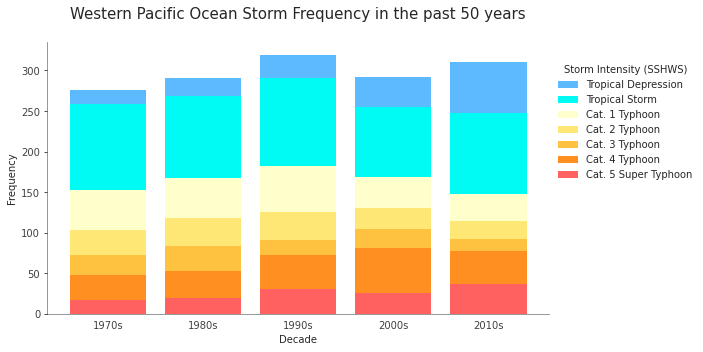

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

plt.figure(figsize=(9,5))
cat1_ty = pivot.xs(key='Category 1 typhoon',level=1)['name'].values
cat2_ty = pivot.xs(key='Category 2 typhoon',level=1)['name'].values 
cat3_ty = pivot.xs(key='Category 3 typhoon',level=1)['name'].values
cat4_ty = pivot.xs(key='Category 4 typhoon',level=1)['name'].values
cat4_sty = pivot.xs(key='Category 4 super typhoon',level=1)['name'].values
cat5_sty = pivot.xs(key='Category 5 super typhoon',level=1)['name'].values 
ts = pivot.xs(key='Tropical storm',level=1)['name'].values
td = pivot.xs(key='Tropical depression',level=1)['name'].values

x = ['1970s','1980s','1990s','2000s','2010s']

p8 = plt.bar(x,cat5_sty,color='#ff6060',label='Cat. 5 Super Typhoon',linewidth=0)
p7 = plt.bar(x,cat4_sty,bottom=cat5_sty,color='#ff8f20',linewidth=0)
p6 = plt.bar(x,cat4_ty,bottom=cat5_sty+cat4_sty,color='#ff8f20',label='Cat. 4 Typhoon',linewidth=0)
p5 = plt.bar(x,cat3_ty,bottom=cat5_sty+cat4_sty+cat4_ty,color='#ffc140',label='Cat. 3 Typhoon',linewidth=0)
p4 = plt.bar(x,cat2_ty,bottom=cat5_sty+cat4_sty+cat4_ty+cat3_ty,color='#ffe775',label='Cat. 2 Typhoon',linewidth=0)
p3 = plt.bar(x,cat1_ty,bottom=cat5_sty+cat4_sty+cat4_ty+cat3_ty+cat2_ty,color='#ffffcc',label='Cat. 1 Typhoon',linewidth=0)
p2 = plt.bar(x,ts,bottom=cat5_sty+cat4_sty+cat4_ty+cat3_ty+cat2_ty+cat1_ty,color='#00faf4',label='Tropical Storm',linewidth=0)
p2 = plt.bar(x,td,bottom=cat5_sty+cat4_sty+cat4_ty+cat3_ty+cat2_ty+cat1_ty+ts,color='#5ebaff',label='Tropical Depression',linewidth=0)

plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.title('Western Pacific Ocean Storm Frequency in the past 50 years\n',fontdict={'size':15})

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::-1], labels[::-1], title='Storm Intensity (SSHWS)',bbox_to_anchor=(1, 0.95),frameon=False)
spines = plt.gca().spines

spines['right'].set_visible(False)
spines['top'].set_visible(False)
spines['left'].set_color([0,0,0,0.5])
spines['bottom'].set_color([0,0,0,0.5])

plt.gca().tick_params(axis='both', which='major',labelcolor=[0,0,0,0.75])
plt.gca().tick_params(axis='y', which='both',left=True)

plt.savefig('assignment4.png')
